# 特徵選取
## 簡易的自行開發作法(From scratch)

In [2]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 設定中文字型
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
#plt.rcParams["font.family"] = ["Microsoft JhengHei"] 
# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

## 載入資料

In [3]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [4]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 178 entries, 0 to 177
Series name: target
Non-Null Count  Dtype
--------------  -----
178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB
None


## 資料分割

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, 
                                                    test_size=0.5, 
                                                    random_state=42)
print(len(X_train), len(X_test))

89 89


跳過特徵縮放

特徵縮放

正規化(Normalization)跟標準化(Standardization)來處理數據，讓資料規模趨於一致

## 模型訓練及評估函數

In [5]:
from sklearn.metrics import accuracy_score
#每一批特徵要進行的計算, indices代表每一批特徵的索引
def calc_score(X_train, y_train, X_test, y_test, indices): # indices是特徵的索引
    # 使用Logistic回歸分類器
    # LogisticRegression() 是一個分類器，適用於二元分類問題
    # 這裡使用Logistic回歸來預測葡萄酒的類型
   
    estimator=LogisticRegression() # 建立邏輯回歸分類器
    # print(indices, X_train.shape)
    estimator.fit(X_train[:, indices], y_train) # 使用選擇的特徵訓練模型
    # 計算並輸出測試集的準確率
    y_pred = estimator.predict(X_test[:, indices])
    score = accuracy_score(y_test, y_pred)
    return score

In [6]:
# 隱藏警告訊息
import warnings # 忽略警告
warnings.filterwarnings('ignore') # 忽略所有警告

## 測試選取2個特徵的所有組合

In [7]:
from itertools import combinations # 用於生成特徵組合
# combinations(iterable, r) 生成 iterable 中所有長度為 r 的組合
# 例如 combinations([1, 2, 3], 2) 會生成 (1, 2), (1, 3), (2, 3) 等組
import numpy as np

scores = []#記錄每組特徵的分數
subsets = []#記錄每組特徵的index

dim=2 #X.shape[1]
indices_ = tuple(range(X.shape[1]))#將所有特徵加上編號
print(indices_)

for p in combinations(indices_, r=dim):#13 取 2-->特徵組合 
    score = calc_score(X_train, y_train, X_test, y_test, p)
    print(p, score)
    scores.append(score)
    subsets.append(p)


(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 1) 0.7752808988764045
(0, 2) 0.7415730337078652
(0, 3) 0.7865168539325843
(0, 4) 0.7078651685393258
(0, 5) 0.8651685393258427


(0, 6) 0.9325842696629213
(0, 7) 0.7191011235955056
(0, 8) 0.7528089887640449
(0, 9) 0.8314606741573034
(0, 10) 0.8314606741573034
(0, 11) 0.8876404494382022
(0, 12) 0.8651685393258427
(1, 2) 0.5955056179775281
(1, 3) 0.6179775280898876
(1, 4) 0.5730337078651685
(1, 5) 0.7191011235955056
(1, 6) 0.7528089887640449
(1, 7) 0.48314606741573035
(1, 8) 0.550561797752809
(1, 9) 0.7640449438202247
(1, 10) 0.550561797752809
(1, 11) 0.6966292134831461
(1, 12) 0.7752808988764045
(2, 3) 0.5842696629213483
(2, 4) 0.5168539325842697
(2, 5) 0.7303370786516854
(2, 6) 0.797752808988764
(2, 7) 0.5168539325842697
(2, 8) 0.5842696629213483
(2, 9) 0.6853932584269663
(2, 10) 0.6629213483146067
(2, 11) 0.7191011235955056
(2, 12) 0.6966292134831461
(3, 4) 0.5393258426966292
(3, 5) 0.7191011235955056
(3, 6) 0.8202247191011236
(3, 7) 0.4943820224719101
(3, 8) 0.6179775280898876
(3, 9) 0.7528089887640449
(3, 10) 0.6966292134831461
(3, 11) 0.6966292134831461
(3, 12) 0.6741573033707865
(4, 5) 0.6853932584269663
(4

In [8]:
print(max(scores))

0.9325842696629213


## 找出準確率最高的組合

In [9]:
best = np.argmax(scores)#取最高分的 index
indices_ = subsets[best]# 對應 特徵編號
print(best, indices_, scores[best])

5 (0, 6) 0.9325842696629213


## 準確率最高的組合為(0, 6)，名稱分別為()

In [10]:
[np.array(X.columns)[i] for i in indices_] # 取得特徵名稱

""" from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)   
from sklearn.feature_selection import SequentialFeatureSelector
# SequentialFeatureSelector(estimator, n_features_to_select=None, 
# direction='forward', scoring=None, cv=5, n_jobs=None, 
# tol=0.0, verbose=0, pre_dispatch='2*n_jobs', random_state=None)
# estimator: 用於評估特徵子集的基礎模型
# n_features_to_select: 要選擇的特徵數量
# direction: 'forward' 或 'backward'，決定特徵選擇的方向
# scoring: 用於評估模型性能的指標
# cv: 交叉驗證的摺數
# n_jobs: 用於並行計算的CPU核心數量
# tol: 容忍度，用於停止準則
# verbose: 控制輸出訊息的詳細程度
# pre_dispatch: 控制並行計算的預調度
# random_state: 用於控制隨機性的種子     """

" from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train_std = sc.fit_transform(X_train)\nX_test_std = sc.transform(X_test)   \nfrom sklearn.feature_selection import SequentialFeatureSelector\n# SequentialFeatureSelector(estimator, n_features_to_select=None, \n# direction='forward', scoring=None, cv=5, n_jobs=None, \n# tol=0.0, verbose=0, pre_dispatch='2*n_jobs', random_state=None)\n# estimator: 用於評估特徵子集的基礎模型\n# n_features_to_select: 要選擇的特徵數量\n# direction: 'forward' 或 'backward'，決定特徵選擇的方向\n# scoring: 用於評估模型性能的指標\n# cv: 交叉驗證的摺數\n# n_jobs: 用於並行計算的CPU核心數量\n# tol: 容忍度，用於停止準則\n# verbose: 控制輸出訊息的詳細程度\n# pre_dispatch: 控制並行計算的預調度\n# random_state: 用於控制隨機性的種子     "

## 測試選取1~13個特徵的所有組合

In [11]:
# 執行有點久
from itertools import combinations # 用於生成特徵組合
# combinations(iterable, r) 生成 iterable 中所有長度為 r 的組合
# 例如 combinations([1, 2, 3], 2) 會生成 (1, 2), (1, 3), (2, 3) 等組

scores = []
subsets = []

best_score_list=[]
best_indices_list=[]
for dim in range(1, X.shape[1]+1): 
    scores=[]
    subsets = []
    indices_ = tuple(range(X.shape[1]))
    for p in combinations(indices_, r=dim):
        score = calc_score(X_train, y_train, X_test, y_test, p)
        #print(p, score)
        scores.append(score)
        subsets.append(p)
    
    best = np.argmax(scores)
    indices_ = subsets[best]
    print(best, indices_, scores[best])
    best_score_list.append(scores[best])
    best_indices_list.append(indices_)

6 (6,) 0.7528089887640449
5 (0, 6) 0.9325842696629213
262 (6, 9, 12) 0.9662921348314607
57 (0, 2, 3, 6) 0.9662921348314607
1268 (6, 7, 8, 9, 12) 0.9775280898876404
1235 (1, 6, 7, 8, 9, 12) 0.9775280898876404
32 (0, 1, 2, 3, 5, 6, 11) 0.9662921348314607
93 (0, 1, 2, 3, 6, 7, 8, 11) 0.9662921348314607
323 (0, 1, 5, 6, 7, 8, 9, 10, 12) 0.9662921348314607
71 (0, 1, 2, 3, 5, 7, 8, 9, 10, 11) 0.9662921348314607
70 (1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12) 0.9662921348314607
12 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) 0.9550561797752809
0 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12) 0.9325842696629213


## 繪圖

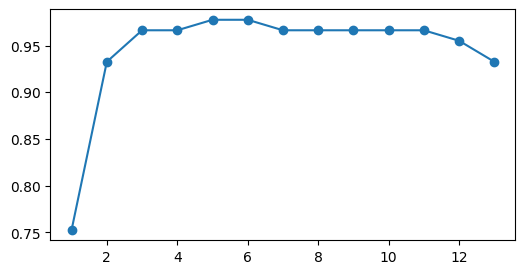

In [12]:
plt.figure(figsize=(6,3))
No=np.arange(1, len(best_score_list)+1)
plt.plot(No, best_score_list, marker='o', markersize=6)

### 可依主觀判斷決定選取特徵數，如以準確率收斂程度為判斷標準，可能會選擇3。

In [13]:
best_indices_list, best_indices_list[2]

([(6,),
  (0, 6),
  (6, 9, 12),
  (0, 2, 3, 6),
  (6, 7, 8, 9, 12),
  (1, 6, 7, 8, 9, 12),
  (0, 1, 2, 3, 5, 6, 11),
  (0, 1, 2, 3, 6, 7, 8, 11),
  (0, 1, 5, 6, 7, 8, 9, 10, 12),
  (0, 1, 2, 3, 5, 7, 8, 9, 10, 11),
  (1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)],
 (6, 9, 12))

In [14]:
[np.array(X.columns)[i] for i in best_indices_list[2]]

['flavanoids', 'color_intensity', 'proline']

# 使用隨機森林比較

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 載入資料

In [16]:
X.columns.to_list()

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [17]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

column_list = X.columns.to_list().copy()
column_list[-2]='od280'# 改欄位名稱
# print(indices)
# print([column_list[i] for i in indices])
for f in indices:
    print(f"{f+1:02d} {column_list[f]:20s} {importances[f]:.4f}")

10 color_intensity      0.1832
07 flavanoids           0.1565
12 od280                0.1390
13 proline              0.1347
01 alcohol              0.1107
11 hue                  0.0687
04 alcalinity_of_ash    0.0519
06 total_phenols        0.0471
09 proanthocyanins      0.0307
05 magnesium            0.0295
02 malic_acid           0.0207
03 ash                  0.0162
08 nonflavanoid_phenols 0.0112


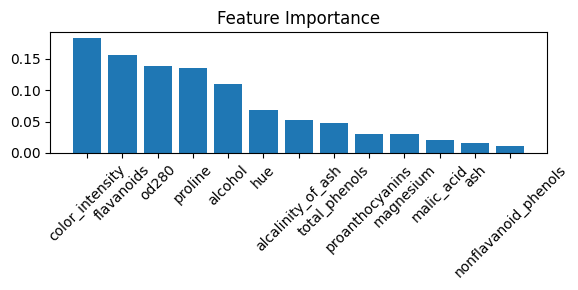

In [18]:
plt.figure(figsize=(6,3))
plt.title('Feature Importance')
plt.bar(range(len(importances)), 
        importances[indices],
        align='center')

plt.xticks(range(len(importances)), 
           np.array(column_list)[indices], rotation=45)
plt.tight_layout()
plt.show()

## Pareto chart

In [19]:
var_exp = importances[indices]
var_exp

array([0.18316182, 0.15649858, 0.13897485, 0.13466894, 0.11069571,
       0.06871541, 0.05193617, 0.04710526, 0.0307224 , 0.02946657,
       0.02065105, 0.016155  , 0.01124823])

In [20]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.18316182, 0.3396604 , 0.47863526, 0.61330419, 0.72399991,
       0.79271532, 0.84465149, 0.89175676, 0.92247915, 0.95194572,
       0.97259677, 0.98875177, 1.        ])

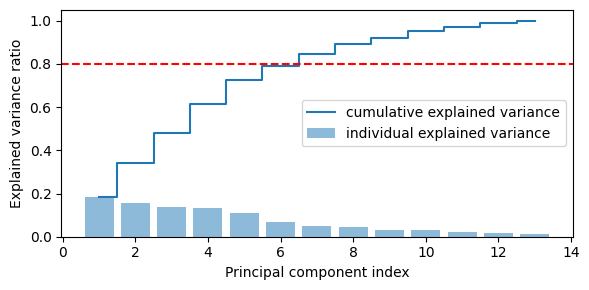

In [21]:
plt.figure(figsize=(6,3))
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.axhline(0.8, color='r', linestyle='--')
plt.show()